In [1]:
import numpy as np
import matplotlib.pyplot as plt
from segmentos import segmentos
from FunXSpectra import FunXSpectra
import os
from relleno_zeros import relleno_zeros
import matplotlib.ticker as mtick

In [20]:
#leer serie en txt y cargar variables
txt_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\background_spectra\utide_valp_2018-04-21to2020-08-01.txt"

lineas=[]
with open(txt_file, 'r') as reader:
    for line in reader.readlines():
        line = line.replace('\n','')
        line=line.rsplit(sep=' ', maxsplit=3)
        lineas.append(line)

lineas=np.array(lineas)

tiempo,mareografo,utide,residuo=lineas[:,0],lineas[:,1],lineas[:,2],lineas[:,3]

#variables guardadas del archivo.txt
tiempo=tiempo.astype(np.datetime64)
mareografo = mareografo.astype(np.float)
utide = utide.astype(np.float)
residuo=residuo.astype(np.float)

## Espectro de fondo para una ventana de tiempo dada

30 series


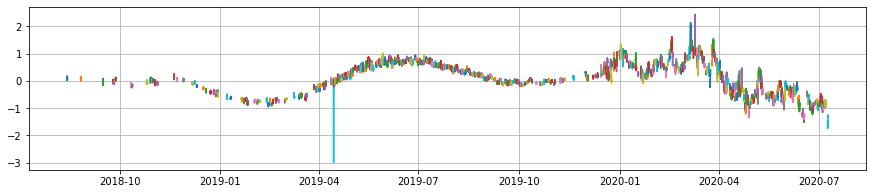

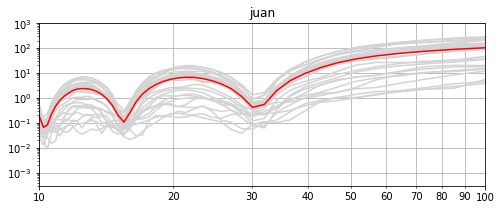

In [15]:
t=tiempo
y=residuo

vent_horas=8

segmentos_t,segmentos_y=segmentos(vent_horas*60*60,60,t,y,1)
segmentos_t,segmentos_y=np.array(segmentos_t),np.array(segmentos_y)

#genera vector con zeros para extender las series hasta tener 2^n elementos
l_original=len(segmentos_y[0])

n_exp=np.ceil(np.log2(l_original))
n_exp=n_exp.astype(int)

l_ext=2**n_exp

zeros=[0]*(l_ext-l_original)


##titulo

codigo=os.path.basename(txt_file).split("_")[1]

##ploteo del espectro de fondo y promedio
fig,ax=plt.subplots(figsize=(8,3))
plt.xlim(10,100)
#plt.ylim(0.001,10)
ax.yaxis.grid(which="major")
ax.xaxis.grid(which="both")

umbral_varianza=0.004
S=[]
n_series=0

cont=0
for i in reversed(range(len(segmentos_y))):
    if np.var(segmentos_y[i])<=umbral_varianza:
        y1=np.append(segmentos_y[i],zeros)
        #y1=segmentos_y[i]
        f,S1,S2,coh2,phase,bw=FunXSpectra(y1,y1,60,4,0)
        S.append(S1)
        n_series=n_series+1
        ax.loglog(1/f/60,S1,color='lightgrey')
        cont=cont+1
        if cont==30:# toma como maximo 30 series de tiempo
            break
        
S=np.array(S)

S_mean=[]
for i in range(S.shape[1]):
    S_mean.append(np.mean(S[:,i]))
ax.loglog(1/f/60,S_mean,color='r')

ax.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax.xaxis.set_minor_formatter(mtick.ScalarFormatter())
titulo=plt.title(codigo)
#ax.invert_xaxis()

print(str(n_series)+' series')

## Espectro de fondo variando ventanas de tiempo

(403, 256)
(138, 512)
(74, 512)
(40, 1024)
(18, 1024)


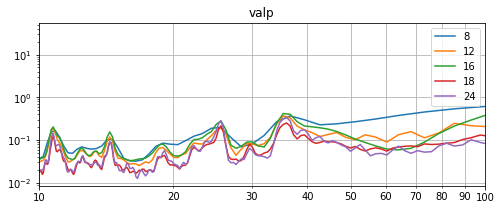

In [21]:
##ploteo del espectro de fondo
fig,ax=plt.subplots(figsize=(8,3))
plt.xlim(10,100)
#plt.ylim(0.001,10)
ax.yaxis.grid(which="major")
ax.xaxis.grid(which="both")

##titulo del grafico
codigo=os.path.basename(txt_file).split("_")[1]

for t_vent in [8,12,16,20,24]:

    vent_horas=t_vent
    
    t=tiempo
    y=residuo

    segmentos_t,segmentos_y=segmentos(vent_horas*60*60,60,t,y,0)
    segmentos_t,segmentos_y=np.array(segmentos_t),np.array(segmentos_y)

    #genera vector con zeros para extender las series hasta tener 2^n elementos
    l_original=len(segmentos_y[0])

    n_exp=np.ceil(np.log2(l_original))
    n_exp=n_exp.astype(int)

    l_ext=2**n_exp

    zeros=[0]*(l_ext-l_original)

    umbral_varianza=0.004
    S=[]
    n_series=0

    cont=0
    for i in reversed(range(len(segmentos_y))):
        if np.var(segmentos_y[i])<=umbral_varianza:
            y1=np.append(segmentos_y[i],zeros)
            #y1=segmentos_y[i]
            f,S1,S2,coh2,phase,bw=FunXSpectra(y1,y1,60,4,0)
            S.append(S1)
            n_series=n_series+1
            #ax.loglog(1/f/60,S1,color='lightgrey')
            cont=cont+1
            #if cont=30:# toma como maximo 30 series de tiempo
            #    break
            
    S=np.array(S)

    S_mean=[]
    for i in range(S.shape[1]):
        S_mean.append(np.mean(S[:,i]))
    ax.loglog(1/f/60,S_mean)
    print(S.shape)

ax.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax.xaxis.set_minor_formatter(mtick.ScalarFormatter())
titulo=plt.title(codigo)
ax.legend([8,12,16,18,24])


##guardar imagen
dir_save=r'G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\background_spectra'
fname=codigo+'_tvar.png'
fig.savefig(os.path.join(dir_save,fname))


# Pruebas

In [ ]:
np.mean(S[1:])

3.77515858932095

In [ ]:
print(S.shape)

(8, 256)


In [ ]:
np.var(segmentos_y[0])

0.009737451281440677